# 机器学习之分类算法
分类：
- 逻辑回归
- 神经网络


####

####

## 支持向量机


首先，导入实验用的数据

## 决策树

### 决策树的超参数
- `max_depth`：树中的最大层级数量。
- `min_samples_leaf`：叶子允许的最低样本数量。
- `min_samples_split`：拆分内部节点所需的最低样本数量。
- `max_features`：寻找最佳拆分方法时要考虑的特征数量。
 
#### 最大深度
决策树的最大深度就是从根到叶之间可能的最大长度。一个最大深度为k的决策树最多有 2^k个叶子。
![决策树的最大深度](img/ML_Classifier/决策树的最大深度.png)

#### 最少样本分割数
一个节点必须至少有min_samples_split个样本才能足够大以进行拆分。如果一个节点的样本数少于min_samples_split 个， 则分割过程停止，该节点不会被分割，且min_samples_split 不会控制叶的最小尺寸
![最小样本分割数](img/ML_Classifier/最小样本分割数.png)

#### 每片叶子的最小样本数
当分割一个节点时，可能会遇到的一个问题是分割不均匀，例如某个子节点有99个样本，另一个子节点可能只有1个样本。这会影响决策树的生成，也浪费计算资源和时间。为避免这种情况，我们可以为每个叶子上允许的样本数设置一个最小值。该参数可以被指定为整数或浮点数，整数代表这片叶子上的最小样本数，浮点数则代表每片叶子傻瓜最小样本的比例，如0.1一片叶子上的样本数量小于该节点中样本数量的10%，则分裂停止。
![每片叶子的最小样本数](img/ML_Classifier/每片叶子的最小样本数.png)

#### 每次分裂的最小样本数
该参数与每片叶子上的最小样本树相同，只不过是应用在节点的分裂当中。

#### 最大特征数
有时，我们会遇到特征数量过于庞大，而无法建立决策树的情况。在这种状况下，对于每一个分裂，我们都需要检查整个数据集中的每一个特征。这种过程极为繁琐。而解决方案之一是限制每个分裂中查找的特征数。如果这个数字足够庞大，我们很有可能在查找的特征中找到良好特征（尽管也许并不是完美特征）。然而，如果这个数字小于特征数，这将极大加快我们的计算速度。

|过拟合|欠拟合|
|:---:|:---:|
|过大的深度|太小的深度|
|每片叶子的最小样本数太少|每片叶子的最小样本数太多|



In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classifier_1.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

测试集和数据集拆分

In [2]:
from sklearn.model_selection import train_test_split
'''
训练集和测试机数据拆分

输入:
    test_size:测试数据占比

返回
    X_train：训练输入数据
    X_test： 测试输入数据
    y_train：训练标签
    y_test： 测试标签
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.25,
    random_state=42
)

## 逻辑回归

定义分类器并将分类器和数据拟合

In [63]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 决策树

In [60]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier()
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()

### 支持向量机
```
SVC(kernel = 'rbf', gamma = 200, degree = None, C = None)
```
- kernel：linear (线性)， poly（多项式）, rbf（高斯核）
- degree：多项式内核的次数（如果选择了多项式内核）
- gamma ：γ 参数
- C：C参数

In [7]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
'''
在测试集上进行数据拟合
'''
classifier.fit(X_train, y_train)

'''
预测
'''
y_pred = classifier.predict(X_test)

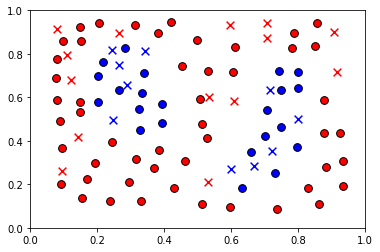

In [66]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

'''
绘制训练集和测试集的结果
'''
plt.scatter(X_train[np.argwhere(y_train==0).flatten(),0], X_train[np.argwhere(y_train==0).flatten(),1], 
            s = 60, color = 'blue', edgecolor = 'k', marker = "o")
plt.scatter(X_train[np.argwhere(y_train==1).flatten(),0], X_train[np.argwhere(y_train==1).flatten(),1], 
            s = 60, color = 'red', edgecolor = 'k', marker = "o")

plt.scatter(X_test[np.argwhere(y_test==0).flatten(),0], X_test[np.argwhere(y_test==0).flatten(),1], 
            s = 60, color = 'blue', edgecolor = 'k', marker="x")
plt.scatter(X_test[np.argwhere(y_test==1).flatten(),0], X_test[np.argwhere(y_test==1).flatten(),1], 
            s= 60, color = 'red', edgecolor = 'k', marker="x")

x_min = math.floor(min(X.min(), X_test.min()))
x_max = math.ceil(max(X.max(), X_test.max()))
y_min = math.floor(min(y.min(), y_test.min()))
y_max = math.ceil(max(y.max(), y_test.max()))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(False)
plt.tick_params(
        axis='x',
        which='both',
        bottom=True,
        top=False)
plt.show()

评估指标**准确率**计算

In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

0.9166666666666666

In [33]:
data.shape

(100, 3)

### 模型选择

#### 学习曲线

In [39]:
import pandas as  pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/classifier_3.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

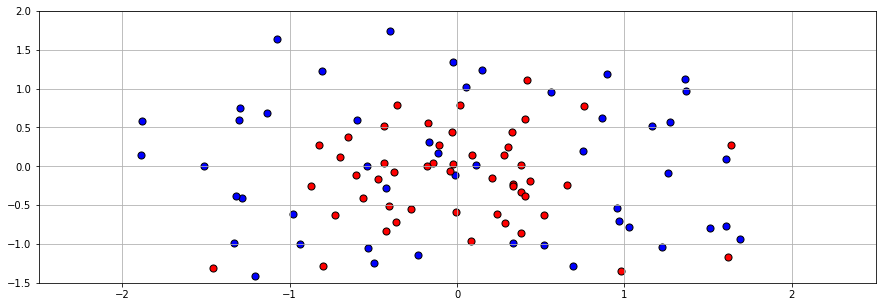

In [34]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

'''
绘制数据的分布
'''
plt.figure(figsize=(15, 5))
plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1], 
            s = 50, color = 'blue', edgecolor = 'k', marker = "o")
plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1], 
            s = 50, color = 'red', edgecolor = 'k', marker = "o")

x_min = math.floor(X.min()) - 0.5
x_max = math.ceil(X.max()) + 0.5
y_min = math.floor(y.min()) - 1.5
y_max = math.ceil(y.max()) + 1.0
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.show()

In [ ]:
# 固定随机数种子
np.random.seed(42)
'''
测试集和训练集划分
'''
X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size = 0.2,  random_state=42)

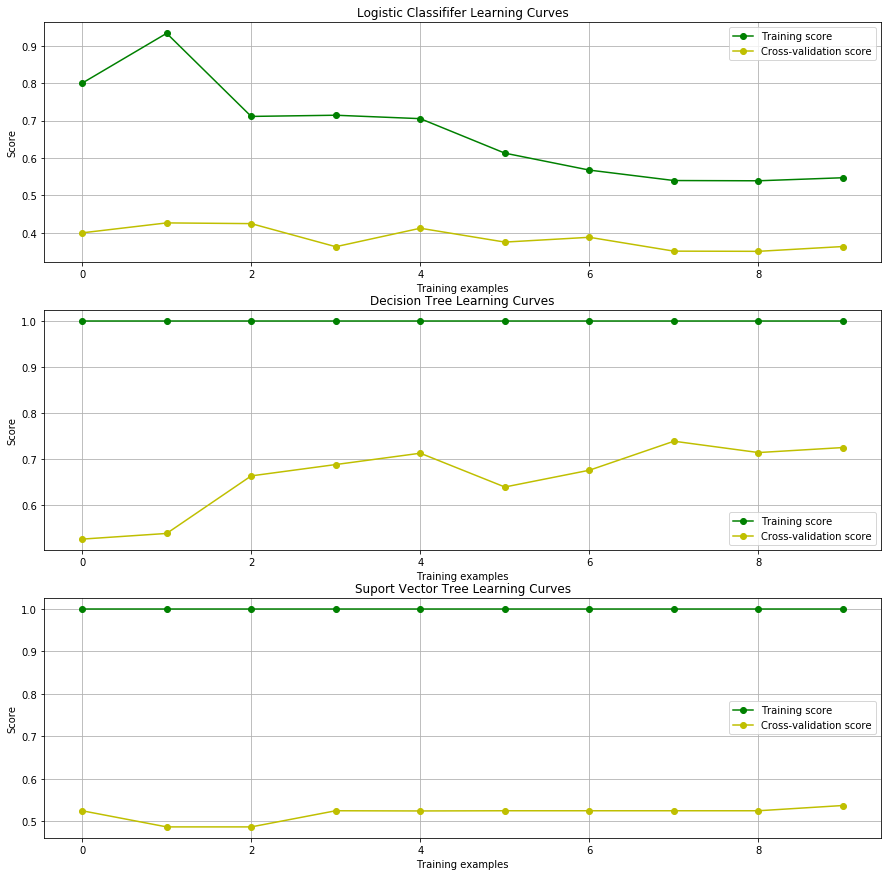

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

'''
在绘制学习曲线前，将数据随机化?
'''
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

def draw_learning_curves(X, y, estimator, num_training):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_training))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y", label="Cross-validation score")
    plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

X2, y2 = randomize(X_train, y_train)
plt.figure(figsize=(15, 15))
plt.subplot(311)

# 定义逻辑回归模型并绘制学习曲线
LogClassififer = LogisticRegression()
draw_learning_curves(X2, y2, LogClassififer, 10)
plt.title("Logistic Classififer Learning Curves")

plt.subplot(312)
#定义决策树模型并绘制学习曲线
DTClassififer = GradientBoostingClassifier()
draw_learning_curves(X2, y2, DTClassififer, 10)
plt.title("Decision Tree Learning Curves")
    
plt.subplot(313)
# 定义支持向量机并绘制学习曲线
SVCClassififer = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X2, y2, SVCClassififer, 10)
plt.title("Suport Vector Tree Learning Curves")
plt.show()

根据上述学习曲线的绘图结果我们可以得出：
- 逻辑回归模型的训练集和验证集的测试得分都很低，根据学习曲线认为该模型欠拟合
- 决策树模型在训练集和验证机上得分都不错，根据学习曲线认为该模型拟合效果不错
- 支持向量机在训练集上得分很高，在验证集上得分很低，根据学习曲线认为该模型过拟合

由此得出：**逻辑回归模型欠拟合, 决策树模型效果不错，支持向量机欠拟合。**


接下来，在实际的模型中检测结果是否时这样，绘制每个模型的界限曲线。

### 模型选择

#### K折交叉验证
将数据集拆分为K个子集，每次将其中一个子集用作测试集，将剩下的K-1个集合组合起来构成训练集，接着计算所有的K次测试的平均误差，这样可以帮助防止过拟合

#### 网格搜索
- 1.首先，定义一些参数来执行网格搜索，不同的算法模型调整的参数会不同：
    - 逻辑回归可选的参数有：
    - 决策树模型可选参数有：
        - max_depth
        - min_samples_leaf
        - min_samples_split。
    - 支持向量机的可选参数有：
        - kernel : ['poly', 'rbf'],
        - C:建议选择指数增长的值，如[0.1, 1, 10, 100]
- 2.使用选择评估测量参数如f1_score，为模型制作记分器。

- 3.使用参数和记分器，在分类器上执行网格搜索。

- 4.将数据拟合到新的分类器中。

- 5.绘制模型并找到评估指标。

- 6.如果模型不太好，请尝试更改参数的范围并再次拟合。

In [44]:
def plot_model(X, y, clf):
    plt.figure(figsize=(15, 5))
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    x_min = math.floor(X.min())
    x_max = math.ceil(X.max())
    y_min = math.floor(y.min()) - 1.5
    y_max = math.ceil(y.max()) + 1.0
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(False)
    plt.tick_params(axis='x', which='both', bottom=False, top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

The training F1 Score is 0.8148148148148148
The testing F1 Score is 0.8


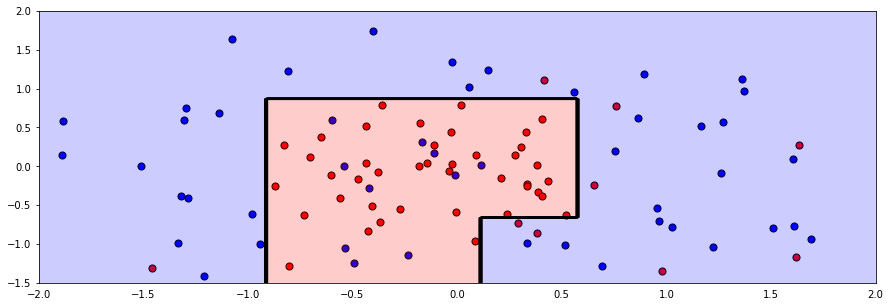

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

DTClassifier = DecisionTreeClassifier(random_state=42)

'''
定义参数来进行网格搜索，将选择的参数形成一个字典，其中键是参数名称，value是参数的可能取值的列表
'''
parameters = {
    "max_depth"           :  [1, 2, 4, 6, 8, 10],
    "min_samples_leaf"    :  [2, 4, 6, 8, 10],
    "min_samples_split"   :  [2, 4, 6, 8, 10]
}

'''
定义评估指标为模型制作计分器，即选择一个指标来为每个参数模型评分
'''
scorer = make_scorer(f1_score)

'''
使用参数和记分器创建GridSearchCV对象，并在分类器上执行网格搜索寻找最优参数。
'''
grid_obj = GridSearchCV(DTClassifier, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

'''
获得最佳估算器 (estimator)
'''
best_clf = grid_fit.best_estimator_

'''
将数据拟合到新的分类器
'''
best_clf.fit(X_train, y_train)

'''
使用新的模型进行数据预测
'''
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

'''
计算新模型的F1 Score
'''
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

'''
绘制新的模型图, 如果模型不太好，请尝试更改参数的范围并再次拟合。
'''
plot_model(X, y, best_clf)

'''
预览新模型最终采用的参数
'''
best_clf